DECISION TREE

In [ ]:
import functools

from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pylab as plt

In [ ]:
# results will be reproducible
np.random.seed(1)

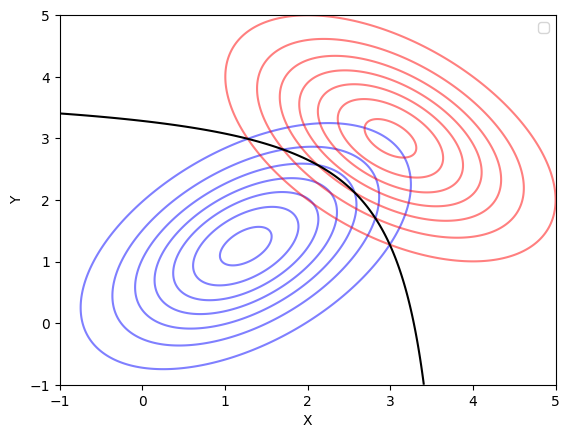

In [ ]:
# Parameters for the two distributions
mean1 = [1.25, 1.25]
cov1 = [[1, 0.5], [0.5, 1]]

mean2 = [3, 3]
cov2 = [[1, -0.5], [-0.5, 1]]

# Create a grid of points
x = np.linspace(-1, 5, 500)
y = np.linspace(-1, 5, 500)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))

# Calculate the probabilities of the two distributions
pdf1 = multivariate_normal(mean1, cov1)
pdf2 = multivariate_normal(mean2, cov2)

# Plot the distributions
plt.contour(X, Y, pdf1.pdf(pos), colors='blue', alpha=0.5)
plt.contour(X, Y, pdf2.pdf(pos), colors='red', alpha=0.5)

# Plot the decision boundary
plt.contour(X, Y, pdf1.pdf(pos) - pdf2.pdf(pos), levels=[0], colors='black')

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Distribution 1', 'Distribution 2', 'Decision Boundary'])

# Show the plot
plt.show()

In [ ]:
# create data set from those distributions
num_samples = 201

X1 = np.random.multivariate_normal(mean1, cov1, 100)
X2 = np.random.multivariate_normal(mean2, cov2, num_samples - len(X1))
y1 = np.zeros(shape=len(X1))
y2 = np.ones(shape=len(X2))

X = np.vstack([X1, X2])
y = np.concatenate([y1, y2])

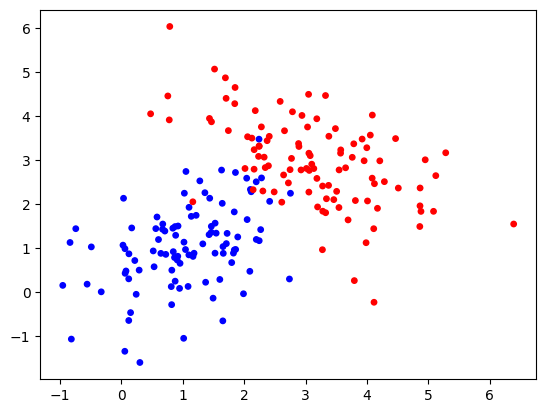

In [ ]:
# visualize data
plt.scatter(X[:, 0], X[:, 1], s=15, c=y, cmap='bwr')

**Decision Tree**

1. Data collection: Gather a dataset consisting of labeled examples, where each example has a set of input features and a corresponding output or target value.

2. Feature selection: Determine which features from the dataset should be used as inputs for the decision tree. The goal is to choose the most relevant features that can effectively predict the target value.

3. Building the tree: Start with the root node, which represents the entire dataset. Select a feature to split the data based on some criteria (e.g., entropy or Gini impurity). This feature should create subsets of data that are more homogeneous in terms of the target value.

4. Splitting the data: Divide the dataset based on the chosen feature into subsets, creating child nodes. Each child node represents a unique value or range of values for the selected feature. Repeat the splitting process recursively for each child node until a termination condition is met. This condition could be reaching a maximum depth, having a minimum number of samples in a node, or other stopping criteria.

5. Assigning predictions: Once the splitting process is complete, assign a prediction or outcome to each leaf node. The prediction could be the majority class of the samples in the leaf node or a probabilistic estimate based on the distribution of target values.

6. Making predictions: Given a new input instance, traverse the decision tree from the root node down to a leaf node, following the decision rules at each internal node. Once a leaf node is reached, the predicted outcome associated with that leaf node is used as the final prediction for the input instance.

In [ ]:
# split data to testing purposes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=1)
clf = clf.fit(X_train, y_train)

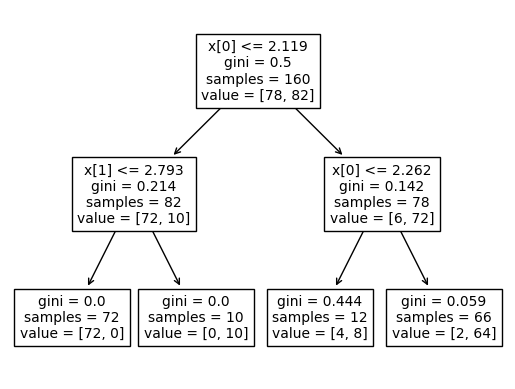

In [ ]:
tree.plot_tree(clf)
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

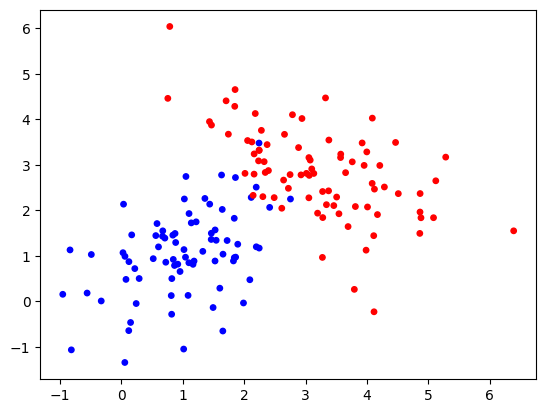

In [ ]:
# visualize data
plt.scatter(X_train[:, 0], X_train[:, 1], s=15, c=y_train, cmap='bwr')

Question: How would you classify following data points?

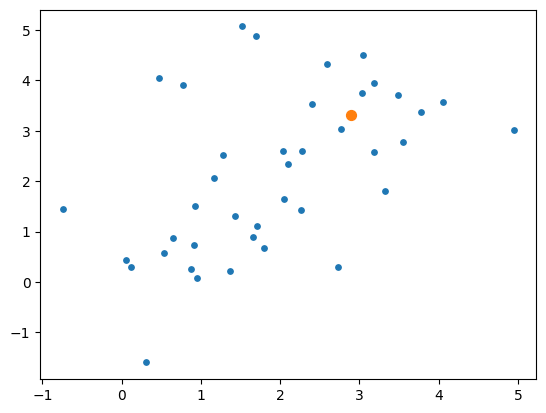

In [ ]:
# 1. example
plt.scatter(X_test[:, 0], X_test[:, 1], s=15)
plt.scatter(X_test[5, 0], X_test[5, 1], s=50)

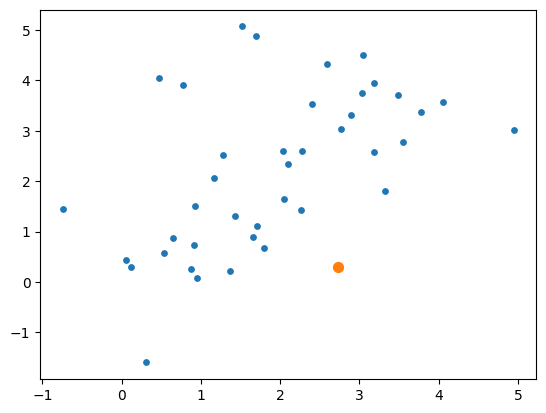

In [ ]:
# 2. example
plt.scatter(X_test[:, 0], X_test[:, 1], s=15)
plt.scatter(X_test[33, 0], X_test[33, 1], s=50)

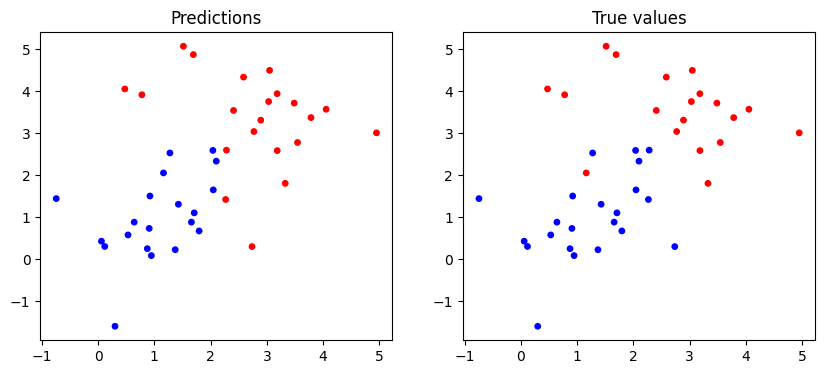

In [ ]:
# visualize data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(X_test[:, 0], X_test[:, 1], s=15, c=y_pred, cmap='bwr')
ax1.set_title('Predictions');
ax2.scatter(X_test[:, 0], X_test[:, 1], s=15, c=y_test, cmap='bwr')
ax2.set_title('True values');

Question: Are you able to spot both types of errors, i.e. originally red but blue now and vise versa?

k-NEAREST NEIGHBORS

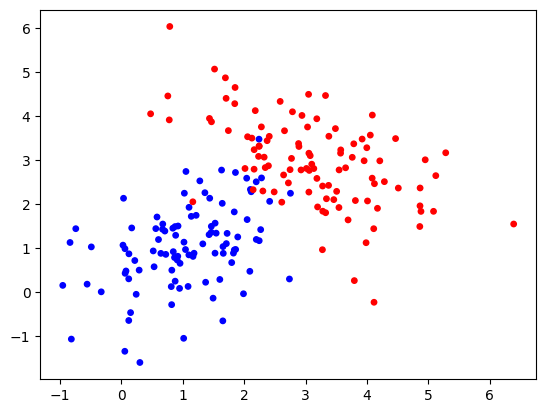

In [ ]:
# visualize data
plt.scatter(X[:, 0], X[:, 1], s=15, c=y, cmap='bwr')

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = clf.predict(X_test)

Question: How would you classify following data point (3, 1)?

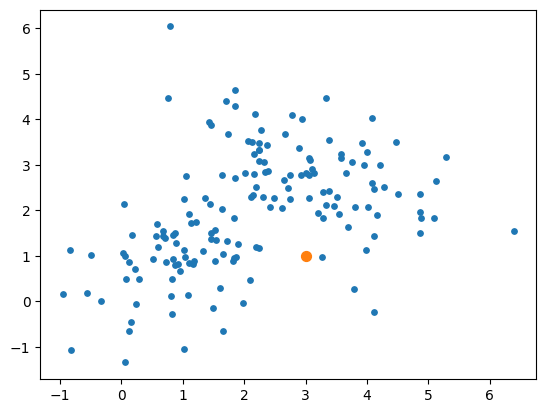

In [ ]:
point = [[3, 1]]
plt.scatter(X_train[:, 0], X_train[:, 1], s=15)
plt.scatter([3], [1], s=50)

In [ ]:
dists, data_ps = clf.kneighbors(point, n_neighbors=1)
print("label:", y_train[data_ps])

label: [[1.]]


In [ ]:
dists, data_ps = clf.kneighbors(point, n_neighbors=3)
print("label:", y_train[data_ps])

label: [[1. 0. 0.]]


In [ ]:
dists, data_ps = clf.kneighbors(point)
print("label:", y_train[data_ps])

label: [[1. 0. 0. 1. 1.]]


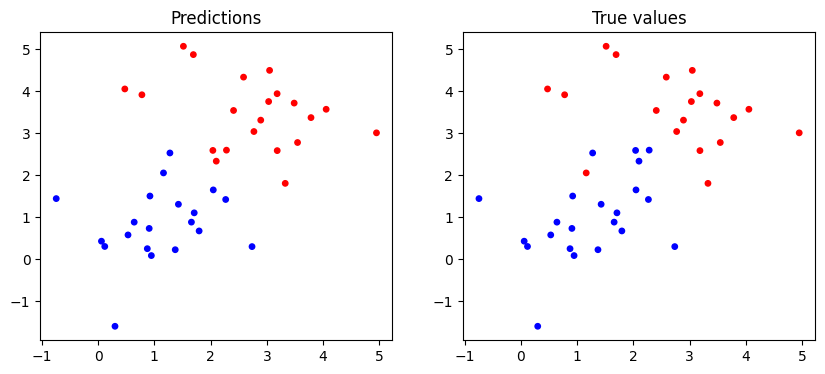

In [ ]:
# visualize data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.scatter(X_test[:, 0], X_test[:, 1], s=15, c=y_pred, cmap='bwr')
ax1.set_title('Predictions');
ax2.scatter(X_test[:, 0], X_test[:, 1], s=15, c=y_test, cmap='bwr')
ax2.set_title('True values');

**Selecting optimal number of neighbors**

1. Split your data into training and validation sets: Divide your dataset into two parts: a training set and a validation set.
The training set will be used to train the KNN model, and the validation set will be used to evaluate its performance.

2. Choose a range of neighbor values: Define a range of potential values for the number of neighbors (e.g., from 1 to 20).

3. Train and evaluate the model for each neighbor value: For each number of neighbors in the defined range, train a KNN model using the training set. Evaluate the performance of the model using the validation set, typically by using a suitable evaluation metric such as accuracy, precision, recall, or F1-score.

4. Select the optimal number of neighbors: Determine the number of neighbors that resulted in the best performance based on the evaluation metric.
This can be the neighbor value that maximizes accuracy or minimizes error, depending on the specific problem and metric.

5. (Optional) Retrain the selected model: Once you have chosen the optimal number of neighbors, you can retrain the model using the entire training dataset (including the validation set).

6. Finally, you can test the model's performance on a separate test set to get a final assessment of its generalization ability.